In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("50_Startups.csv")
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
data.shape

(50, 5)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


<Axes: >

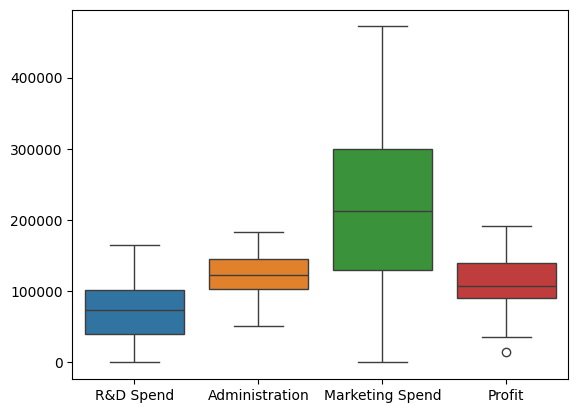

In [5]:
sns.boxplot(data)

In [6]:
#profit has a outlier but profit is our target variable


In [7]:
data.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [8]:
data["State"].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [9]:
# we have a categorical datatypes we have to encode
state=pd.get_dummies(data["State"],drop_first=True)
state=state.astype("int64")
state.head()

,Florida,New York
0,0,1
1,0,0
2,1,0
3,0,1
4,1,0


In [10]:
data=pd.concat([data,state],axis=1)
data.drop("State",axis=1,inplace=True)
data.head()

,R&D Spend,Administration,Marketing Spend,Profit,Florida,New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


In [11]:
X=data.drop("Profit",axis=1)
y=data["Profit"]

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=0)

In [15]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [16]:
lr.fit(X_train,y_train)

LinearRegression()

In [17]:
y_pred=lr.predict(X_test)

In [19]:
from sklearn.metrics import r2_score
print("R2 Score : ",r2_score(y_test,y_pred))

R2 Score :  0.9347068473282423
